In [1]:
from spacy.tokens import DocBin
from ml_datasets import imdb
from tqdm import tqdm
import matplotlib.pyplot as plt
import spacy
import pandas as pd
import seaborn as sns

In [2]:
train_data, valid_data = imdb()

In [3]:
df_train = pd.DataFrame(train_data, columns =['Review', 'Sentiment'])
df_validation = pd.DataFrame(valid_data, columns =['Review', 'Sentiment'])

In [4]:
pd.set_option('display.max_colwidth', None)

df_train.head()

,Review,Sentiment
0,"The documentary revolves around Eva Mozes Kor, a holocaust survivor, part of Mengele's experiments on twins, consisting primarily her version of what happened at Auschwitz, and a comparison of the emotions of the other survivors of the twin experiments. The movie obviously had great reviews. It's one of those topics that no one dares to voice a contrary opinion about.\n\n\n\nI too, for a large part of the movie, got sucked into the emotion that the movie-maker so obviously wanted the viewer to concentrate on. One of the user reviews on IMDb by Eric Monder (obviously having nothing critical to say about the issue on a public forum) could only find the sweetest nectar. ""In one of the many dramatic sequences, as a group of Jews argue with Kor at a Jewish center, the meaning of the word ""forgive"" is even debated, but the isolated and outnumbered Kor holds her own"" But by this time, the sappy hold that the movie had on my dormant emotional repertoire had let loose enough that I could see clearly once more. After the ""strong-willed"" Eva Kor forgives her ""Nazi captors"" the movie begins to delve into what forgiving is all about, at least from the viewpoint of Kor. The movie goes about following her, past her public statement forgiving the Nazis and into new territory. To me, this was the meat of the movie, surrounded by inedible fat of her ""act of forgiveness"". Obviously, it was a very sick cow.\n\n\n\nOn a mission to test her theory of forgiveness, in order to heal wounds of the past, she makes her way to the ""promised land"" to meet with some Arabs, to discuss with them the issues that they face and to see if dialogue cannot lead to a better understanding of the situation and heavily interspersed with debates and discussions with Jews in the US on her act of forgiving the Nazis, including one at a Jewish center in Chicago. From then on, anyone not so teary eyed that they can't see the screen will find it hard-pressed to miss the obvious contradiction in her statements.\n\n\n\nFirstly, you immediately notice her body language, defensive and unwilling to listen in a room full of Arab scholars and teachers. Her comments about how she feared that they might kidnap her shows how much of a waste of time, effort and money the entire act was. A rather annoyed Dr Sami Advan (Professor of education at Bethlehem University) gets it just right when he tells Kor off for a statement she makes about how she would rather be asleep in her apartment.\n\n\n\nFinally, the debate at the Jewish center in Chicago, where she is ""grilled"" on the meaning of forgiveness and her right to do so, in the wake of those that continue suffering through the trauma of the acts.\n\n\n\nI will cut to the chase. By the end of the movie, I was hoping I hadn't chosen to watch the movie. The movie was badly made, failing to delve deeper into anything about Auschwitz apart from the purely trivial, just sufficient to make sure the holocaust is refreshed in the viewers memory and to incite a barrage of tears. It showed that Kor, the subject of the documentary was unable to engage in fair discussion. Her discussion abilities were limited to parroting her stance on forgiveness (at best) to a complete unwillingness to listen or participate.\n\n\n\nLastly, is everyone so retarded today that they can't notice the difference between making peace and forgiving? Quoting another IMDb user, ""I don't see her forgiveness as being weak- quite the contrary, she just wanted to relieve its hold from her soul, she wanted the suffering to be over, so she let it go."" That would be the perfect layman's definition of MAKING PEACE.\n\n\n\nI guess, in a world of propaganda, blind faith and political correctness, there is no room to question those that have ""gone through more than the human mind can fathom"".\n\n\n\nP.S. The dictionary certainly should go into all those Books-to-buy lists everyone keeps making.",neg
1,"There was a stylish approach to this film on 

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

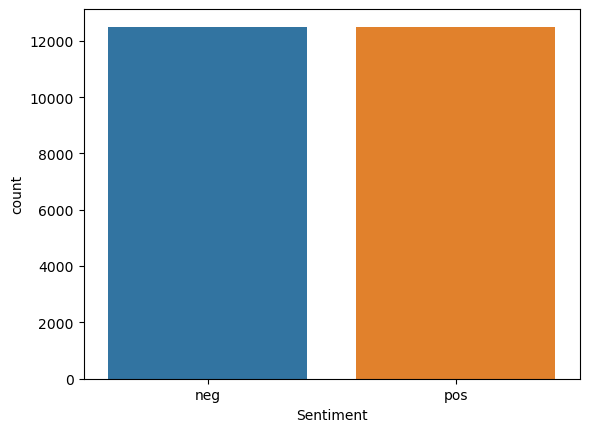

In [5]:
sns.countplot(x=df_train['Sentiment'])

## Preprocessing Text

In [6]:
def remove_new_line(text):
    return text.replace('\n', ' ')

In [7]:
df_train['Review'] = df_train['Review'].apply(remove_new_line)
df_validation['Review'] = df_validation['Review'].apply(remove_new_line)

## Create spaCy Docs

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
def make_docs(dataframe):
    docs = []
    data = list(dataframe.itertuples(index=False, name=None))
    
    for doc, label in tqdm(nlp.pipe(data, as_tuples=True), total=len(data)):
        if label == 'pos':
            doc.cats['positive'] = 1
            doc.cats['negative'] = 0
        else:
            doc.cats['positive'] = 0
            doc.cats['negative'] = 1
        docs.append(doc)
    
    return docs

In [10]:
training_number = 1000

train_docs = make_docs(df_train[:training_number])
doc_bin = DocBin(docs=train_docs)
doc_bin.to_disk('./data/train.spacy')

valid_docs = make_docs(df_validation[:training_number])
doc_bin = DocBin(docs=valid_docs)
doc_bin.to_disk('./data/valid.spacy')

100%|██████████| 1000/1000 [00:25<00:00, 38.92it/s]


In [11]:
token_length = []
for review in train_docs:
  token_length.append(len(review))

<AxesSubplot: ylabel='Count'>

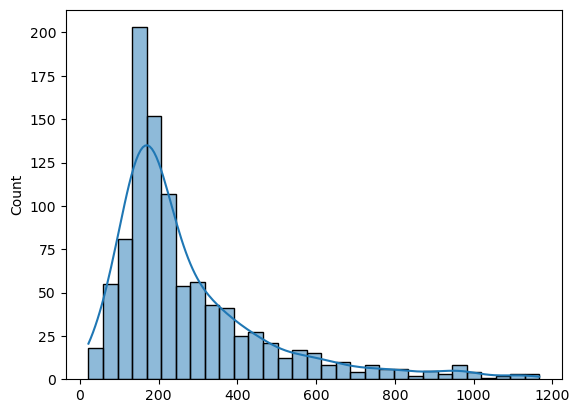

In [12]:
sns.histplot(token_length, kde=True)

In [13]:
from statistics import mean, median

print(min(token_length))
print(max(token_length))
print(mean(token_length))
print(median(token_length))

22
1167
275.842
204.0


## Create Training Config
Create a base config file using spaCy's [online config generator](https://spacy.io/usage/training#quickstart).
Select `textcat` as Component and exclusive categories. Choosing exlucsive categories will lead to prediction of one and only one category. Leave Hardware as CPU since we're using a non-transformer architecture. Copy the generated config to `base_config.cfg`

In [14]:
!python -m spacy init fill-config ./base_config.cfg ./config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [15]:
!python -m spacy train config.cfg --output ./output

ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-10-10 12:25:11,318] [INFO] Set up nlp object from config
[2022-10-10 12:25:11,324] [INFO] Pipeline: ['textcat']
[2022-10-10 12:25:11,326] [INFO] Created vocabulary
[2022-10-10 12:25:11,327] [INFO] Finished initializing nlp object
[2022-10-10 12:25:14,515] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.25       33.91    0.34
  0     200         56.25       66.70    0.67
  0     400         39.82       77.59    0.78
  0     600         33.89       77.86    0.78
  0     800         23.17       79.88    0.80
  1    1000         23.17       78.10    0.78
  1    1200          6.03       79.7

## Testing

In [16]:
nlp = spacy.load('./output/model-best')

In [17]:
text = df_train.at[6000, 'Review']
label_true = df_train.at[6000, 'Sentiment']

In [18]:
doc = nlp(text)

In [19]:
doc

This is a kind of movie that will stay with you for a long time. Soha Ali and Abhay Deol both look very beautiful. Soha reminds you so much of her mother Sharmila Tagore. Abhay is a born actor and will rise a lot in the coming future.    The ending of the movie is very different from most movies. In a way you are left unsatisfied but if you really think about it in real terms, you realize that the only sensible ending was the ending shown in the movie. Otherwise, it would have been gross injustice to everyone.     The movie is about a professional witness who comes across a girl waiting to get married in court. Her boyfriend does not show up and she ends up being helped by the witness. Slowly slowly, over the time, he falls in love for her. It is not clear if she has similar feelings for him or not. Watch the movie for complete details.     The movie really belongs to Abhay. I look forward to seeing more movies from him. Soha is pretty but did not speak much in the movie. Her eyes, her

In [20]:
print(doc.cats)
print(label_true)

{'positive': 0.9928078651428223, 'negative': 0.007192074786871672}
pos


In [29]:
doc = nlp("I love this movie. It is great. Blah Blah Blah Blah. Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah BlahBlah Blah Blah BlahBlah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah.Blah Blah Blah Blah")
print(len(doc))
print(doc.cats)

159
{'positive': 0.8549286127090454, 'negative': 0.14507141709327698}
